# 12. Large Area Rainfall-Runoff Modeling

:::{admonition} Course Website
[Link to Course Website](http://54.243.252.9/ce-3354-webroot/)
:::



---
## Readings

1. [Gupta, R.S., 2017. Hydrology and Hydraulic Systems, pp. 711-734](https://www.waveland.com/browse.php?t=384)

1. [Chow, V.T., Maidment, D.R., Mays, L.W., 1988, Applied Hydrology:  New York, McGraw-Hill. **pp. xx-xxx** ](http://54.243.252.9/ce-3354-webroot/3-Readings/CMM1988/Applied%20Hydrology%20VT%20Chow%201988.pdf) 

2. Brutsaert,  W.  2005.  Hydrology  :   An  Introduction  (8th  printing),  Cambridge  University Press. NewYork.

1. [Cleveland, T. G. (2017) *Engineering Hydrology Notes to Accompany CE 3354 (Rational Equation, HEC-HMS)*, Department of Civil, Environmental, and Construction Engineering, Whitacre College of Engineering.](http://54.243.252.9/ce-3354-webroot/1-Lectures-2017/Lecture09.pdf)

1. [Subdivision of Texas Watersheds for Hydrologic Modeling](http://54.243.252.9/about-me-webroot/about-me/MyWebPapers/project_reports/0-5822-1/)

2. [Rate-Based Estimation of the Runoff Coefficients for Selected Watersheds in Texas](http://54.243.252.9/ce-3354-webroot/3-Readings/RateBasedC/Rate-Based-C-Texas.pdf)

3. [Kuichling, E. (1889). “The relation between the rainfall and the discharge of sewers in populous areas.” Trans. ASCE, 20(1), 1–56. ](http://54.243.252.9/ce-3354-webroot/ce-3354-webbook-2024/3-Readings/kuichling89-c.pdf)

4. [Small Watershed Hydrology (WinTR-55) (Software)](https://www.ars.usda.gov/research/software/download/?softwareid=8&modecode=80-42-05-10)

5. [Small Watershed Hydrology (WinTR-55) (User Manual)](http://54.243.252.9/ce-3354-webroot/3-Readings/TR55Manual/TR55Manual.pdf)

5. [Small Watershed Hydrology (Original Technical Report)](http://54.243.252.9/ce-3354-webroot/3-Readings/TR55Manual/Hydraulics-07-G-Urban-Hydrology-Small-Watersheds.pdf)


## Videos



## Outline
- Rainfall-Runoff Modeling
 - Linear Reservoir Conceptualization
 - NRCS Runoff Generation Models
 - TR-55 Model


## Course Resources
- [Syllabus](http://54.243.252.9/ce-3354-webroot/0-Syllabus/)

---

## Rainfall-Runoff Modeling

A rainfall-runoff model is a mathematical model describing the rainfall–runoff relations of a rainfall catchment area, drainage basin or watershed. It produces a runoff hydrograph in response to rainfall inputs, represented by a hyetograph. In other words, the model calculates the conversion of rainfall into runoff.

In comparatively sophisticated modeling one considers the rainfall signal coming into the watershed, filtered by losses from evapotranspiration, infiltration, any water that is added to storage - what remains is the runoff. 


### Linear Reservoir Model

As a starting point, consider a linear-reservoir model of the watershed.  Conceptually the linear reservoir model employs the water budget for a watershed, and that discharge from the watershed is proportional to the current accumulated storage.  

Starting with something like the sketch below.

![](linearReservoir.png)

One relates the discharge formula and the storage formula.  The discharge formula, is where the "linear" part arises (linear in accumulated watershed depth) the constant $\frac{1}{\alpha}$ is just some property of the watershed; $\alpha$ is non zero.

$$Q(t) = \frac{1}{\alpha}~A~\bar h(t)$$

And the storage formula is

$$P(t)~A - Q(t) = \frac{dS}{dt}$$

with a substitution

$$P(t)~A - C~A~\bar h(t) = \frac{dS}{dt}$$

Storage itself is simply the product of the accumulated watershed depth and area

$$S = A~\bar h(t)$$

Another substitution

$$P(t)~A - \frac{1}{\alpha}~A~\bar h(t) = \frac{dA~\bar h(t)}{dt}$$

Now we can factor out the obvious constants to obtain

$$A[P(t) - \frac{1}{\alpha}~\bar h(t)] = A~\frac{d~\bar h(t)}{dt}$$

Seperate, integrate, and simplify; we assume that $P$ is some constant (otherwise the analysis is a bit more complex)

$$Q = A~\frac{1}{\alpha}~\bar h(t) = A~P(1-e^{-\frac{t}{\alpha}})$$

Now naturally we dont know $\alpha$ for a watershed, hence the need for data analysis.  Suppose for the sake of demonstration it is 1.0, we can simulate the anticipated discharge for a watershed (in the absence of losses)



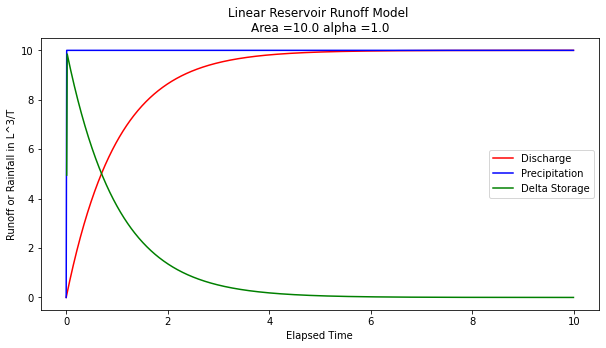

In [39]:
# structural simulation need units for practical applications
import math
alpha = 1.0 #watershed discharge conversion constant
area = 10.0 #some area
pee = 1.0 #constant rain
qzero = 0 #zero initial discharge
hzero = 0 #zero initial storage
howmany = 1000
qnow = [0 for i in range(howmany)]
pnow = [0 for i in range(howmany)]
dsnow = [0 for i in range(howmany)]
time = [0 for i in range(howmany)]
deltat = 0.01 # time step value
dsnow[0]=math.inf # set first condition at infinty
for itime in range(1,howmany):
    time[itime] = deltat+time[itime-1]
    qnow[itime]=(area*pee*(1.0-math.exp(-time[itime]/alpha)))
    pnow[itime]=(area*pee)
    average_in=0.5*(pnow[itime]+pnow[itime-1])
    average_out=0.5*(qnow[itime]+qnow[itime-1])
    dsnow[itime]=((average_in-average_out))

import matplotlib.pyplot # the python plotting library
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.plot(time, qnow, color ='red') 
matplotlib.pyplot.plot(time, pnow, color ='blue') 
matplotlib.pyplot.plot(time, dsnow, color ='green') 
matplotlib.pyplot.xlabel("Elapsed Time") 
matplotlib.pyplot.ylabel("Runoff or Rainfall in L^3/T") 
matplotlib.pyplot.title("Linear Reservoir Runoff Model \n"+"Area ="+str(area)+" alpha ="+str(alpha) )
matplotlib.pyplot.legend(["Discharge","Precipitation","Delta Storage"])
matplotlib.pyplot.show() 



A interpretation of this kind of model can serve as an explaination of the NRCS CN method (but in cumulative space)

## NRCS Runoff Generation Models

The CN method is in common use and is examined here.
The curve number approach is based on a volume balance. 
The derivation is in the National Engineering Handbook Chapter 10.

The curve number is a solution to:

$$ 
Q = \frac{(P-0.2S)^2}{P+0.8S}
$$

where $Q$ is the cumulative runoff (integral of the hydrograph) in watershed depth (i.e. Discharge/Area), P is the cumulative rainfall (integral of the hyetograph). Drainage area is used to make units consistent; either divide Q by area to get a depth, or multiply P by area to get volume). S is the retention (like a storage term).

The curve number, $CN$, is simply a transformation of $S$

$$CN = \frac{1000}{S+10}$$

The $CN$ values for a large number of land coverages (hydrologic soil complex coverage number; or runoff curve number) were tabulated by the NRCS many years ago. 
It is of note that the method was intended for agricultural use. 

Equations similar in structure to the NRCS equations above can be constructed by assuming the watershed operates as a linear reservoir and such an analysis provides some understanding of $CN$ (as other than just a tabulation). When viewed in such a fashion the $CN$ is like a response or residence time parameter ($\alpha$ in our linear reservoir model above) and represents how long in dimensionless time it takes the watershed to reach an equilibrium storage condition where the precipitation that enters leaves. 
Large values (90+) are "fast" responding watersheds, small values (50-ish) are "slow" responding watersheds.

The figure below is the typical graphical representation from NRCS sources.

![](CNchart.png)

Now lets demonstrate that structurally the $CN$ model is explainable as a particular interpretation of a linear reservoir model.

Start with linear reservoir model, but include some abstractions.  Show in cumulative space to get CN-type model.

## Interpretation of NRCS CN as a linear reservoir model

Assume a watershed can be represented as a linear reservoir, where the discharge is proportional to accumulated storage. 
Using the $CN$ variable names and definitions it is possible to construct a discharge function that is a decaying exponential. 
The decay rate conveys similar information as the curve number, that is it relates how much cumulative precipitation must occur before the retention is satisfied and the ratio of actual to potential retention becomes one.

First the variable names associated with the Figure below and their definitions from chapter 10, NEH.

![](CNReservoir.png)

- $I_a$ is the initial abstraction - it represents input rainfall that never appears as runoff and is removed at the beginning of an event.
- $F_a$ is the watershed retention - it represents the depth of water retained on the watershed after runoff begins.  In our previous model it plays the same role as $\bar h$
- $S$ is the potential watershed retention after runoff begins - it represents the maximum possible depth of of water retained on the watershed if the rain goes on forever.
- $Q$ is the actual runoff depth.
- $P$ is the actual rainfall depth.


The figure above is a sketch of a watershed as a reservoir. 
The area is $A$, precipitation rate is $i$, the initial abstraction is $I_a$ and the actual retention (accumulated depth on the watershed in excess of $I_a$) is $F_a$. 
The discharge in volume units is $qA$.
If one writes a mass balance on the watershed in terms of $F_a$, **ASSUMING** the initial abstraction is already satisfied (as in the NRCS definition of $F_a$ above), then the resulting equation is

$$A~\frac{d F_a}{dt} = A(i -q) $$

Normalizing by the constant watershed area

$$~\frac{d F_a}{dt} = (i -q) $$

The units of precipitation and discharge are now $\frac{L}{T}$ (depth per unit time). 
The units of **accumulated** depth are length (thus the time derivative is L/T). If we **ASSUME** a linear response, that is the specific discharge is proportional to accumulated depth ($F_a$) we can postulate a model for the discharge as 

$$q = \frac{1}{\alpha}F_a $$

The term $\alpha$ is some non-zero constant that reflects the discharge from the watershed as some proportion of accumulated depth.

Now substitute into the mass balance and solve for $F_a$ and **ASSUME** that precipitation rate is a constant value one can arrive at:

$$q = \frac{1}{\alpha}F_a = i(1-e^{-\frac{t}{\alpha}})$$

In this formula time begins when $I_a$ is satisfied.

Now examine the definitions of $P$ and $Q$ (or $P_e$) in the NRCS documents. By defintion:

$$Q = \int_{lb}^{ub}q(\tau)d\tau = it+i \alpha  e^{-\frac{t}{\alpha}} -i \alpha$$

$$P = it + I_a + F_a$$

Now construct a plot (simulation) that plots $Q$ versus $P$ for different values of alpha (plus an equal value line) we have

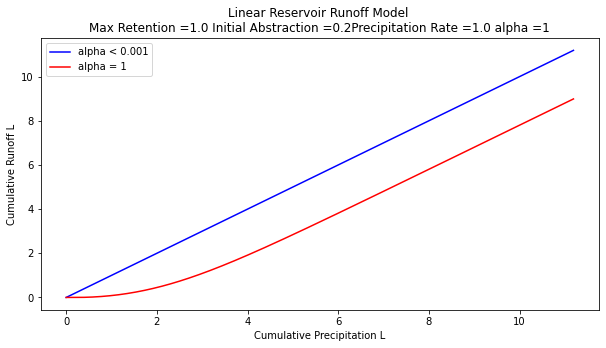

In [23]:
# structural simulation need units for practical applications
import math
howmany = 1000
alpha = 1 #watershed discharge conversion constant
peein = 1.0
abstraction = 0.2
retention = 0.0
maxretention = 1.0

def qfunc(inflow,time,alpha):
    qfunc = inflow*(1.0-math.exp(-time/alpha))
    return(qfunc)

qnow = [0 for i in range(howmany)]
pnow = [0 for i in range(howmany)]
rnow = [0 for i in range(howmany)]
time = [0 for i in range(howmany)]
deltat = 0.01 # time step value
# time zero values
qnow[0]=peein*time[0]+peein*alpha*math.exp(-time[0]/alpha)-peein*alpha
for itime in range(1,howmany):
    time[itime] = deltat+time[itime-1]
    qnow[itime]=peein*time[itime]+peein*alpha*math.exp(-time[itime]/alpha)-peein*alpha
    rnow[itime]=alpha*qfunc(peein,time[itime],alpha)
    pnow[itime]=peein*time[itime]+abstraction+rnow[itime]



import matplotlib.pyplot # the python plotting library
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.plot(pnow, pnow, color ='blue') 
matplotlib.pyplot.plot(pnow, qnow, color ='red') 
#matplotlib.pyplot.plot(time, dsnow, color ='green') 
matplotlib.pyplot.xlabel("Cumulative Precipitation L") 
matplotlib.pyplot.ylabel("Cumulative Runoff L") 
matplotlib.pyplot.title("Linear Reservoir Runoff Model \n"+"Max Retention ="+str(maxretention)+
                        " Initial Abstraction ="+str(abstraction)+"Precipitation Rate ="+str(peein)+" alpha ="+str(alpha) )
matplotlib.pyplot.legend(["alpha < 0.001","alpha = "+str(alpha),"Delta Storage"])
matplotlib.pyplot.show() 

Now if we compare the appearance of the simulation figure to the NRCS chart we can observe that the charts convey the same kinds of curves, specifically the amount of precipitation accumulation required to produce constant runoff, as well as the conversion ratio between observed cumulative precipitation and observed cumulative runoff. In the case of the linear-reservoir model, the information is conveyed by the parameter $\alpha$ which dimensionally is a residence time, while the curve number $CN$ plays a similar role in the NRCS methodology.

A bit more examination and we can conjecture:

1. $\alpha = \frac{100-CN}{10}$ will generate identical looking curves to the NRCS charts
2. $i\alpha = S$ thus the product of the residence time and intensity is the maximum potential retention.
3. Runoff starts (in the time domain) at $t_r = I_a = \frac{\alpha}{5}$

So lets modify the script to reflect this conjecture

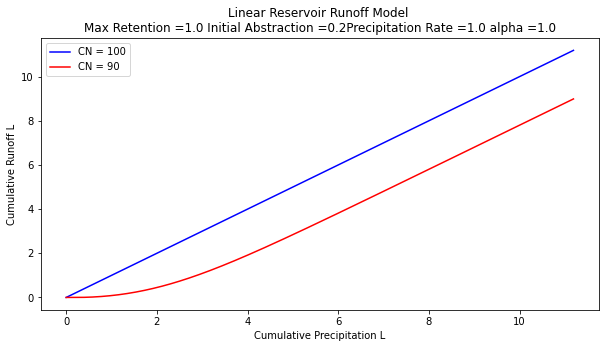

In [24]:
# structural simulation need units for practical applications
import math
howmany = 1000
CN = 90
alpha = (100-CN)/10 #watershed discharge conversion constant
peein = 1.0
abstraction = 0.2
retention = 0.0
maxretention = 1.0

def qfunc(inflow,time,alpha):
    qfunc = inflow*(1.0-math.exp(-time/alpha))
    return(qfunc)

qnow = [0 for i in range(howmany)]
pnow = [0 for i in range(howmany)]
rnow = [0 for i in range(howmany)]
time = [0 for i in range(howmany)]
deltat = 0.01 # time step value
# time zero values
qnow[0]=peein*time[0]+peein*alpha*math.exp(-time[0]/alpha)-peein*alpha
for itime in range(1,howmany):
    time[itime] = deltat+time[itime-1]
    qnow[itime]=peein*time[itime]+peein*alpha*math.exp(-time[itime]/alpha)-peein*alpha
    rnow[itime]=alpha*qfunc(peein,time[itime],alpha)
    pnow[itime]=peein*time[itime]+abstraction+rnow[itime]



import matplotlib.pyplot # the python plotting library
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.plot(pnow, pnow, color ='blue') 
matplotlib.pyplot.plot(pnow, qnow, color ='red') 
#matplotlib.pyplot.plot(time, dsnow, color ='green') 
matplotlib.pyplot.xlabel("Cumulative Precipitation L") 
matplotlib.pyplot.ylabel("Cumulative Runoff L") 
matplotlib.pyplot.title("Linear Reservoir Runoff Model \n"+"Max Retention ="+str(maxretention)+
                        " Initial Abstraction ="+str(abstraction)+"Precipitation Rate ="+str(peein)+" alpha ="+str(alpha) )
matplotlib.pyplot.legend(["CN = 100","CN = "+str(CN),"Delta Storage"])
matplotlib.pyplot.show() 

so in practice we don't use the $CN$ model as a linear reservoir. It is strictly treated as a runoff generation procedure - its useful and practical, but is built on limited assumptions.

The $CN$ values are tabulated in many locations including:

- [WSS](https://websoilsurvey.sc.egov.usda.gov/App/HomePage.htm)  After an AOI is delineated, the soils property tab will return CN values associated with each soil texture.
- [NEH Chapter 9](https://directives.sc.egov.usda.gov/OpenNonWebContent.aspx?content=17758.wba) Tables of CN for different soil textures
- [Texas HDM](http://onlinemanuals.txdot.gov/txdotmanuals/hyd/hydrograph_method.htm#JSGEGKGG) Similar to above, with some probability and geographic corrections.

:::{note}
The $CN$ method using composite curve numbers is one of the suggested methods to consider in the Hardin Creek design/analysis project.  While by no means the bestest, its not bad for the application and relatively easy to parameterize and is built-in to HEC-HMS the design/analysis tool you will use.
:::